# Chapter 4 - Practical Data Visualization
## Segment 4 - Creating labels and annotations

In [44]:
%config IPCompleter.greedy=True

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

In [97]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4

### Labeling plot features
#### The functional method

(9,) (9,)


Text(0, 0.5, 'This is my y axis')

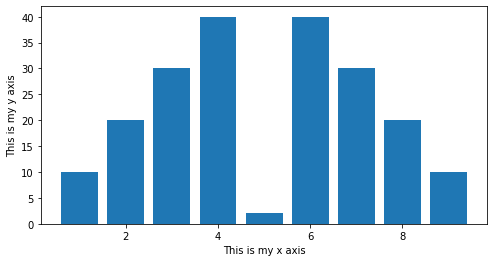

In [13]:
x = np.arange(1,10)
y = np.append(np.append(np.arange(10,50,10),2), np.arange(40,0,-10))
print(x.shape, y.shape)

plt.bar(x, y)
plt.xlabel('This is my x axis')
plt.ylabel('This is my y axis')

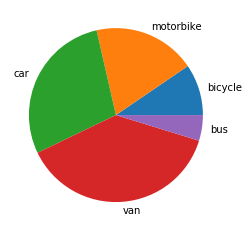

In [14]:
z = [1,2,3,4,.5]
veh_label = ['bicycle', 'motorbike', 'car', 'van', 'bus']

plt.pie(z, labels = veh_label)
plt.show()

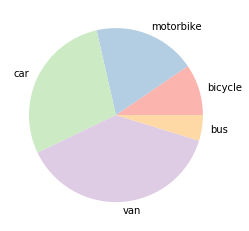

In [23]:
color_set = plt.get_cmap('Pastel1')
plt.pie(z, labels = veh_label, colors = color_set(np.arange(0,len(z))))
plt.show()

#### The object-oriented method

           car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


Text(0, 0.5, 'miles per gallon')

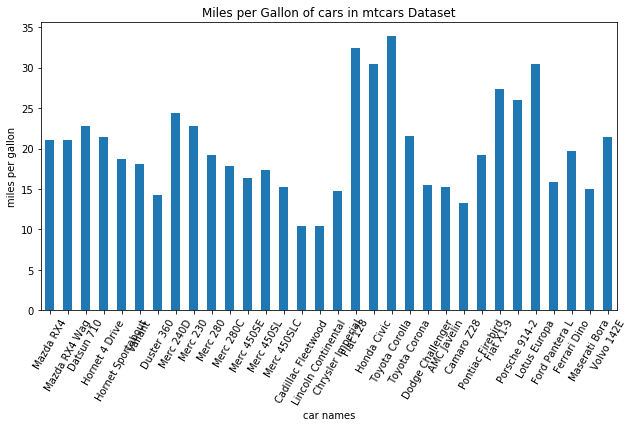

In [33]:
address = '../Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
print(cars.head())

df = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

df.plot(kind = 'bar')
ax.set_xticks(np.arange(len(cars.car_names)))
ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('Miles per Gallon of cars in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles per gallon')


### Adding a legend to your plot
#### The functional method

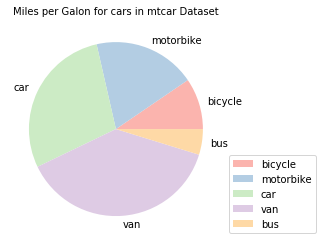

In [40]:
color_set = plt.get_cmap('Pastel1')
plt.pie(z, labels = veh_label, colors = color_set(np.arange(0,len(z))))
plt.legend(veh_label, loc = [1.02,0.02]) # loc can be 'best', 'top left', etc.
plt.title('Miles per Galon for cars in mtcar Dataset', fontsize=10, loc = 'center')
plt.show()

#### The object-oriented method

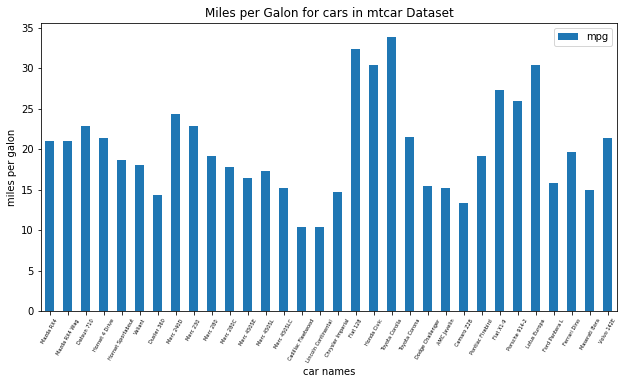

In [58]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

df.plot(kind = 'bar')

ax.set_xticks(np.arange(len(cars.car_names)))
ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 5)

ax.set_xlabel('car names')
ax.set_ylabel('miles per galon')

ax.set_title('Miles per Galon for cars in mtcar Dataset')

ax.legend(loc = 'best')

### Annotating your plot

In [94]:
# car name for max miles per galon
top_row = cars[cars.mpg == cars.mpg.max()]
top_car, top_mpg, top_x = top_row.car_names.values[0], top_row.mpg.values[0], top_row.index[0]
print(top_car, top_mpg, top_x)

Toyota Corolla 33.9 19


Text(21, 34.9, 'Toyota Corolla')

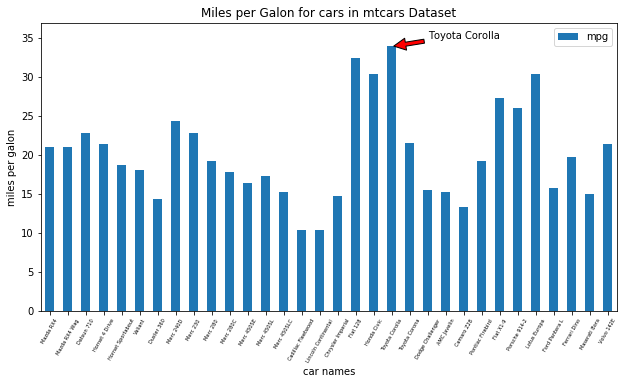

In [98]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

df.plot(kind = 'bar')

ax.set_xticks(np.arange(len(cars.car_names)))
ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 5)

ax.set_xlabel('car names')
ax.set_ylabel('miles per galon')
ax.set_title('Miles per Galon for cars in mtcars Dataset', loc = 'center')
ax.legend(loc = 'best')

ax.set_ylim([0,top_mpg+3])

ax.annotate(s = top_car, xy = (top_x, top_mpg), xytext = (top_x+2, top_mpg+1), 
            arrowprops = dict(facecolor='red', shrink = 0.05))
